In [8]:
import os, json
import pandas as pd

import utils

%matplotlib inline

# make time series to dataframe

In [9]:
nums_folder = "./data/sec"
num_prefix = "numbers_sec-numbers"

df_nums = utils.load_folder_csv(nums_folder, prefix=num_prefix)
len(df_nums)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


6247866

In [11]:
tags = json.loads(open('freq_tags.json', 'r').read())
len(tags)

208

In [12]:
df_quarters = df_nums[df_nums['number_of_quarters']==1]
len(df_quarters)

1363249

In [13]:
df_quarters.head()

,submission_number,company_name,measure_tag,version,period_end_date,number_of_quarters,units,dimension_hash,iprx,value,footnote,footnote_length,num_dimensions,coregistrant,duration_fraction,date_fraction,decimal
22,0001047469-15-003049,INTERNATIONAL LEASE FINANCE CORP,FairValueMeasurementNonrecurringBasisAssetRecl...,0001047469-15-003049,20140430,1,USD,0x75ad5ded176d309d618ffa977f8e8804,0,1.261400e+07,NaN,0,5,NaN,-0.446575,-13.0,-3
47,0001047469-15-003049,INTERNATIONAL LEASE FINANCE CORP,OperatingLeasesIncomeStatementDepreciationExpe...,us-gaap/2014,20140430,1,USD,0xa29a9a368eea3f598cbf78c49801bb4f,0,3.020000e+06,NaN,0,5,NaN,-0.446575,-13.0,-3
49,0001047469-15-003049,INTERNATIONAL LEASE FINANCE CORP,FairValueInputsDiscountRate,us-gaap/2014,20140430,1,pure,0x8ade5b12442a07fcb93c7d9a2f4eb577,0,1.320000e-01,NaN,0,6,NaN,-0.446575,-13.0,3
62,0000078003-15-000026,PFIZER INC,DerivativeInstrumentsGainLossReclassifiedFromA...,us-gaap/2015,20150331,1,USD,0xc31fe30aa8d64c36a318796ba02cb81e,0,3.730000e+08,NaN,0,5,NaN,0.046576,2.0,-6
2003,0000935703-15-000050,DOLLAR TREE INC,AllocatedShareBasedCompensationExpense,us-gaap/2015,20150430,1,USD,0xc79ab32503e7231abc31d48677d8bf0b,0,6.800000e+06,NaN,0,5,NaN,0.013699,-2.0,-5


In [17]:
df_quarters_tag = df_quarters[df_quarters['measure_tag'].isin(tags)]
len(df_quarters_tag)

794905

In [9]:
df_quarters_tag[df_quarters_tag['submission_number']=="0001193125-10-183206"].groupby('period_end_date')

In [18]:
def split_date_int(row, date_col="period_end_date"):
    dt = row[date_col]
    day = dt%100
    month = dt/100%100
    year = dt/10000
    
    return pd.Series({'year':year, 'month':month, 'day':day})

In [19]:
df_date = df_quarters_tag.apply(split_date_int, axis=1)
df_date.describe()

,day,month,year
count,794905.000000,794905.000000,794905.000000
mean,30.387833,6.118460,2012.197054
std,0.521786,2.464229,1.937250
min,28.000000,1.310000,1993.123100
25%,30.000000,3.310000,2011.033100
50%,30.000000,6.300000,2012.033100
75%,31.000000,7.310000,2014.033100
max,31.000000,12.310000,2019.033100


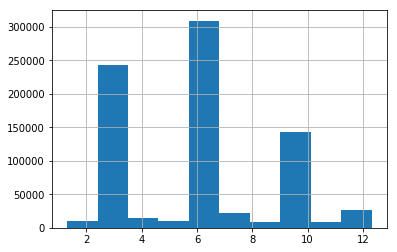

In [20]:
df_date['month'].hist()